## create variables

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets

### variables

In [50]:
# House Price
price=2000000
# Down Payment
downPayment=200000
# Down payment percent
downPcnt=downPayment/price
# Loan Amount
loanAmt= price-downPayment
# Annual Interest Rate (percent%)
interestRate= 7.21
# Life of Loan (Years) aka: Loan term
loanTerm= 30
# Number of Payments per Year
nAnnualPayments= 12
# Interest Total Cost
interestCost=(interestRate/100)*loanAmt
# Monthly mortgage
#mortgageMonthly=(loanAmt+interestCost)/(loanTerm*nAnnualPayments)
#mortgageInterestYearly=interestCost/(loanTerm*nAnnualPayments)

# propTax (percent)
taxYearly=price*(18.42/1000)
taxMonthly=taxYearly/12
# Insurance (percent)
insurancePcnt= .04
#Monthly insurance
insuranceYearly=price*insurancePcnt
# HOA (monthly)
hoaYearly=360*12

# Yearly income
incomeAnnual=300000

# Annual house appreciation
pctAnnualGrowth=.05

rentMonthly=3500

### Amortization schedule averaged years

In [9]:
def calculate_amortization_schedule(loan_amount, annual_rate, loan_term_years):
    monthly_rate = annual_rate / 100 / 12
    total_payments = loan_term_years * 12

    # Calculate fixed monthly mortgage payment
    monthly_payment = loan_amount * monthly_rate / (1 - (1 + monthly_rate) ** -total_payments)

    schedule = []
    balance = loan_amount

    for month in range(1, total_payments + 1):
        interest = balance * monthly_rate
        principal = monthly_payment - interest
        balance -= principal

        schedule.append({
            "Month": month,
            "Payment": round(monthly_payment, 2),
            "Principal": round(principal, 2),
            "Interest": round(interest, 2),
            "Balance": round(balance if balance > 0 else 0, 2)
        })

    return schedule

def get_values_from_key(list_of_dictionaries, key):
    """
    Extracts all values associated with a specific key from a list of dictionaries.

    Args:
        list_of_dictionaries: A list of dictionaries.
        key: The key to extract values for.

    Returns:
        A list containing all values associated with the given key.
    """
    return [dictionary[key] for dictionary in list_of_dictionaries if key in dictionary]
    
def average_chunks(X, chunk_size=12):
    """
    Averages every `chunk_size` consecutive items in list X.

    :param X: List of numbers (length must be divisible by chunk_size)
    :param chunk_size: Number of items to average together
    :return: List of averaged values
    """
    if len(X) % chunk_size != 0:
        raise ValueError("List length must be divisible by chunk size.")

    return [
        sum(X[i:i + chunk_size]) / chunk_size
        for i in range(0, len(X), chunk_size)
    ]

def Sum_years(sched,Var):
    Val=get_values_from_key(sched,Var)
    return average_chunks(Val, chunk_size=12)

### Make equation for growth

In [10]:
def calc_investment_growth(price, pctAnnualGrowth, y, compounds_per_year=1):
    """
    Calculates the future value of an investment using compound interest.

    :param price: Initial investment amount (P)
    :param pctAnnualGrowth: Annual interest rate (in percent, e.g. 5 for 5%)
    :param y: Number of years the money is invested (t)
    :param compounds_per_year: Number of times interest is compounded per year (n)
    :return: Future value of the investment (A)
    """
    growth = (price * (1 + pctAnnualGrowth / compounds_per_year) ** (compounds_per_year * y))-price
    return growth

In [11]:
def create_growthChart(n):
    yearList=range(n)
    growthChart = []
    for x in yearList:
        growthChart.append(round(calc_investment_growth(price, pctAnnualGrowth, x, compounds_per_year=1)))
    return growthChart

### Schedule

In [12]:
schedule=calculate_amortization_schedule(loanAmt, interestRate, loanTerm)

### Mortgage yearly equation

In [13]:
mortgageYearly=Sum_years(schedule,"Payment")

### Interest yearly equation

In [14]:
interestYearly=Sum_years(schedule,"Interest")

### Principle Yearly

In [15]:
principalYearly=Sum_years(schedule,"Principal")

In [16]:
def calc_cost(y,principal):
    cost=sum(principal[:y])+((insuranceYearly+taxYearly+hoaYearly)*y)
    return cost

In [17]:
def create_costChart(n):
    yearList=range(n)
    costChart = []
    for x in yearList:
        costChart.append(round(calc_cost(x,principalYearly)))
    return costChart

In [25]:
def calc_rent(y):
    rent=y*12*rentMonthly
    return rent

In [28]:
def create_rentChart(n):
    yearList=range(n)
    rentChart=[]
    for x in yearList:
        rentChart.append(round(calc_rent(x)))
    return rentChart

In [35]:
def chart_costs(n):

    y1 = np.array(create_costChart(n))
    y2 = np.array(create_growthChart(n))
    y3 = np.array(create_rentChart(n))
    plt.plot(y1,label="costs")
    plt.plot(y2,label="gains")
    plt.plot(y3,label="rent spent")
    plt.legend(loc="upper left")
    plt.ticklabel_format(axis='both', style='plain',)

    plt.show()

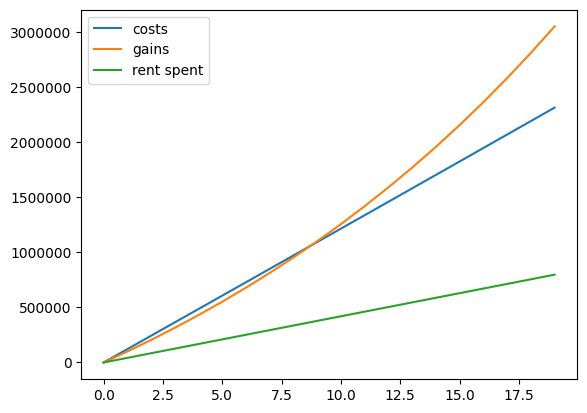

In [51]:
 chart_costs(20)

## determine monthly costs